<a href="https://colab.research.google.com/github/cristian-nicp/regresionLinealPr-ctica-IMLplatzi-/blob/master/implementacionRegresionLineal(IMLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import torch.nn as nn# redes neuronales,necesitamos una relación lineal que viene en este modo
import torch.optim as optim# va a traer la oprimizacion necesaria para calcular las gradientes y hacer un backpropagation
import matplotlib.pyplot as plt

# Regresión Lineal

---



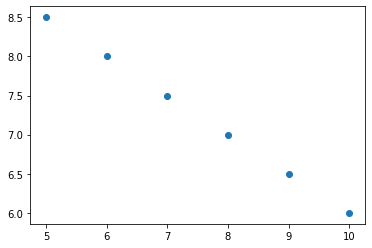

In [3]:
#Vamos a hacer unidades vendidas de autos explicadas por los precios
car_prices = [5 ,6 ,7 ,8 ,9 ,10]
units_sold = [8.5 ,8.0 ,7.5 ,7 ,6.5 ,6.0]#Vamos a suponer que a un precio menor se venden más unidades
plt.scatter(car_prices ,units_sold)#Graficamos

**Este arreglo que tenemos en python,lo vamos a convertir en un array de numpy para poder tener en claro el proceso de conversión de datos.El algunos casos voy a trabajar así,en otros desde numpy y en otros, la data ya va a estar listo en pytorch en un formato de tensor**

In [10]:
prices_array = np.array(car_prices).reshape(-1, 1)#le damos una forma diferente con reshape
units_array = np.array(units_sold).reshape(-1, 1)

print(prices_array)#El arreglo que tenia antes ahora tiene un formato distinto,esto me va a servir para cuando se lo envie a pytorch para convertirlo en un tensor
print()
print(units_array)

[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

[[8.5]
 [8. ]
 [7.5]
 [7. ]
 [6.5]
 [6. ]]


In [17]:
#Ahora voy a convertir a ambos en tensores
prices = torch.from_numpy(prices_array).float().requires_grad_(True)#el ultimo _ significa que va a modificar el arreglo como tal,y el tensor es el que sufre la modificacion,por lo que va a quedar con los gradientes activados
units = torch.from_numpy(units_array).float().requires_grad_(True)

print(prices ,prices.shape)
print()
print(units ,units.shape)

tensor([[ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], requires_grad=True) torch.Size([6, 1])

tensor([[8.5000],
        [8.0000],
        [7.5000],
        [7.0000],
        [6.5000],
        [6.0000]], requires_grad=True) torch.Size([6, 1])


0.014876127243041992


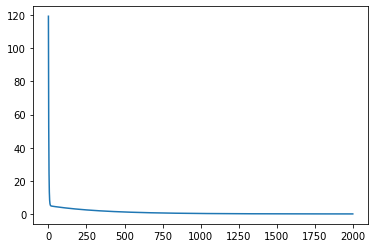

In [20]:
#AHORA EMPIEZO A CREAR EL MODELO
model = nn.Linear(1, 1)#los parametros que va a recibir son el tamaño de la entrada y la salida,dim
loss_function = nn.MSELoss()#función de perdida,uso la media de cuadrado de los errores
optimizer = optim.SGD(model.parameters(),lr = 0.015)#Definimos el optimizador sgd=stochastic gradient descent. Los parametros son los pesos(w), y tengo que especificarle cuál es el learning rate,que son los pasos que voy dando para minimizar la perdida a traves del gradiente
#voy a trabajar con un batch de datos para calcular el gradiente,no trabajo con el dataset completo,ni con un dato, sino que es el punto intermedio
#Con esto listo,voy a crear mi training loop, para ver como vamos entrenando,graficamos los losses vs el num de interaciones
losses = []
iterations = 2000

for i in range(iterations):#Todo esto es el forward pass
  pred = model(prices)#por cada iteracion regresar una prediccion que es ejecutar un forward pass con el modelo que definimos que es una relación lineal y envio los precios como parametro
  loss = loss_function(pred, units)#Luego necesito saber el loss#cuanto estoy adivinando(pred),y cuanto es en realidad(units)
  losses.append(loss.data)#Puedo agregar a mi arreglo la perdida que tuve en ese momento

  optimizer.zero_grad()#previo a hacer el backward voy a reiniciar los gradientes xq pytorch acumula,y si no hago esto, el resultado no va a ser el que busco porque los gradientes se siguen acumulando
  #Ahora necesito un backward pass
  loss.backward()#Ahora si ya puedo hacer el backpropagation que es parte de mi training loop
  optimizer.step()#En base a los grad que se calcularon me muevo un poco en direccion al minimo

print(float(loss))#cual fue el ultimo loss
plt.plot(range(iterations), losses)#grafico las iteraciones junto con los losses

In [25]:
#Mi modelo ya está entrenado, entonces ya puede predecir
x = torch.Tensor([[3.0]])#seria el precio
p = model(x)
p

tensor([[9.1602]], grad_fn=<AddmmBackward>)